In [4]:
# Import
import pymc as pm
import arviz as az

print(f"PyMC version: {pm.__version__}")
print(f"ArviZ version: {az.__version__}")

import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

PyMC version: 5.20.1
ArviZ version: 0.20.0


In [6]:
# Set wd
os.chdir('/Users/diarmuidlenihan/aml_project')
print("Current working directory:", os.getcwd())

Current working directory: /Users/diarmuidlenihan/aml_project


In [14]:
# Load dataset

file_path_aml = "aml_outcomes.csv"
aml_data = pd.read_csv(file_path_aml)

In [17]:
# Cleaning
aml_data['days_to_death'] = pd.to_numeric(aml_data['days_to_death'], errors='coerce')
aml_data['survival_time'] = aml_data['days_to_death'] - aml_data['days_to_birth']
aml_data['sex'] = aml_data['sex'].map({'Male': 0, 'Female': 1})
aml_data['vital_status'] = aml_data['vital_status'].map({'LIVING': 0, 'DECEASED': 1})
aml_data = pd.get_dummies(aml_data, columns=['risk_cyto', 'risk_molecular', 'FAB'], drop_first=True)
aml_data_cleaned = aml_data.drop(columns=['patient_ID', 'race', 'days_to_birth', 'days_to_death'])

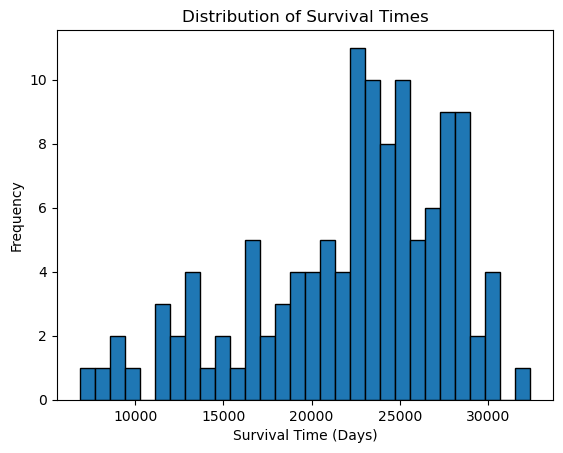

In [19]:
# Exploratory Data Analysis
plt.hist(aml_data_cleaned['survival_time'].dropna(), bins=30, edgecolor='k')
plt.xlabel("Survival Time (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Survival Times")
plt.show()

In [21]:
# Bayesian Survival Modelling
with pm.Model() as aml_model:
    lambda_ = pm.Exponential("lambda", 1.0)  # Exponential prior for survival rate
    
    # Likelihood (Exponential survival model)
    survival_obs = pm.Exponential("survival_obs", lambda_, observed=aml_data_cleaned['survival_time'].dropna())
    
    # Sampling
    trace = pm.sample(1000, return_inferencedata=True)

ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/gra


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_iptjd7zq
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/gra


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_45vveycl
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/gra


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_fns0__03
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/gra


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_1tptayzn
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/gra


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_oxw5j7ec
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/gra


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_wcfuv4ru
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/re


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_dfxk87tc
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/re


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_8rrkeias
library d64 is not found.


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1916, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py", line 1086, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/rewriting/basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pytensor/graph/re


You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_gbc0i84v
library d64 is not found.

You can find the C code in this temporary file: /var/folders/p1/p7d2kznj2ngb8ygpywx3dw800000gn/T/pytensor_compilation_error_yrer5m9z
library d64 is not found.


CompileError: Compilation failed (return status=1):
/opt/anaconda3/bin/clang++ -dynamiclib -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -fPIC -undefined dynamic_lookup -ld64 -I/opt/anaconda3/lib/python3.12/site-packages/numpy/core/include -I/opt/anaconda3/include/python3.12 -I/opt/anaconda3/lib/python3.12/site-packages/pytensor/link/c/c_code -L/opt/anaconda3/lib -fvisibility=hidden -o /Users/diarmuidlenihan/.pytensor/compiledir_macOS-15.2-arm64-arm-64bit-arm-3.12.2-64/lazylinker_ext/lazylinker_ext.so /Users/diarmuidlenihan/.pytensor/compiledir_macOS-15.2-arm64-arm-64bit-arm-3.12.2-64/lazylinker_ext/mod.cpp
ld: library not found for -ld64
clang++: error: linker command failed with exit code 1 (use -v to see invocation)


In [ ]:
# Plot Posterior Distribution
az.plot_posterior(trace, var_names=["lambda_"])
plt.show()

### Overview
This script performs Bayesian survival analysis on Acute Myeloid Leukemia (AML) patient data. It consists of three main steps:

1. **Data Cleaning**:
   - Converts survival time from available fields.
   - Encodes categorical variables such as sex and risk categories.
   - Removes unnecessary columns.

2. **Exploratory Data Analysis (EDA)**:
   - Plots the distribution of survival times to assess the variability in patient survival.

3. **Bayesian Survival Modelling**:
   - Defines an exponential prior distribution for survival rate.
   - Models survival time using an exponential likelihood function.
   - Uses Markov Chain Monte Carlo (MCMC) sampling to infer the posterior distribution of survival rate (`lambda_`).
   - Visualizes the posterior distribution to interpret results.

This approach allows us to estimate patient survival probabilities in a probabilistic framework, offering insights into AML prognosis.
"""